In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
procurement = pd.read_csv('data_2/procurement_2.csv')

In [3]:
procurement.dropna(subset=['date_of_contract_close', 'date_of_publication'], inplace=True)

In [4]:
procurement["bids_submission_deadline"] = pd.to_datetime(procurement["bids_submission_deadline"], format='%Y-%m-%d', errors = 'coerce')
procurement["date_of_contract_close"] = pd.to_datetime(procurement["date_of_contract_close"], format='%Y-%m-%d', errors = 'coerce')
procurement["date_of_publication"] = pd.to_datetime(procurement["date_of_publication"], format='%Y-%m-%d', errors = 'coerce')

In [5]:
#procurement.dropna(subset=['date_of_contract_close', 'date_of_publication'], inplace=True)
#procurement.dropna(subset=['bids_submission_deadline', 'date_of_publication'], inplace=True)

In [6]:
procurement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30130 entries, 0 to 31552
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  30130 non-null  int64         
 1   bids_submission_deadline            15438 non-null  datetime64[ns]
 2   code_from_nipez_codelist            28540 non-null  object        
 3   contract_price                      30130 non-null  float64       
 4   contract_price_vat                  30130 non-null  float64       
 5   contract_price_with_amendments      30130 non-null  float64       
 6   contract_price_with_amendments_vat  30130 non-null  float64       
 7   date_of_contract_close              30129 non-null  datetime64[ns]
 8   date_of_publication                 30130 non-null  datetime64[ns]
 9   is_association_of_suppliers         30123 non-null  object        
 10  procurement_name           

In [7]:
procurement['publication_close_interval'] = (procurement['date_of_contract_close'] - procurement['date_of_publication']).dt.days
procurement['bids_close_interval'] = (procurement['bids_submission_deadline'] - procurement['date_of_publication']).dt.days

In [8]:
procurement

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,...,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id,publication_close_interval,bids_close_interval
0,1,NaT,15710000-8,38973.48,44820.00,38973.48,44820.00,2022-03-02,2022-03-02,False,...,Liberecký kraj,NaN,N006/22/V00004456,Public contract for deliveries,Zadávání VZ na základě rámcové dohody bez obno...,1,1,1,0.0,NaN
1,2,NaT,50110000-9,9832.02,11896.74,9832.02,11896.74,2023-11-23,2023-11-30,False,...,Jihočeský kraj,NaN,N006/23/V00033550,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,2,1,2,-7.0,NaN
2,3,NaT,NaN,130000.00,130000.00,130000.00,130000.00,2022-02-24,2022-03-02,False,...,NaN,Small-scale public contract,N006/22/V00004676,Public contract for deliveries,Otevřená výzva,1,1,3,-6.0,NaN
3,4,NaT,90511000-2,26580.00,32161.80,26580.00,32161.80,2022-03-07,2022-03-07,False,...,Liberecký kraj,NaN,N006/22/V00004924,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,1,1,4,0.0,NaN
4,5,NaT,90500000-2,8468.00,9314.80,8468.00,9314.80,2023-10-24,2023-10-24,False,...,Středočeský kraj,NaN,N006/23/V00030140,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,3,1,5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31548,31623,NaT,90500000-2,0.00,0.00,0.00,0.00,2020-06-24,2021-03-22,False,...,Hlavní město Praha,Small-scale public contract,N006/21/V00006509,Public contract for services,Uzavřená výzva,3174,420,1162,-271.0,NaN
31549,31624,NaT,30121100-4,0.00,0.00,0.00,0.00,2021-06-10,2021-06-20,False,...,Hlavní město Praha,Small-scale public contract,N006/21/V00015961,Public contract for deliveries,Uzavřená výzva,3174,420,585,-10.0,NaN
31550,31625,NaT,09123000-7,0.00,0.00,0.00,0.00,2020-07-03,2020-07-30,False,...,Česká republika,Above-limit public contract,N006/20/V00019093,Public contract for deliveries,Jednací řízení bez uveřejnění,1559,179,874,-27.0,NaN
31551,31626,2023-03-01,50100000-6,141855.33,171644.95,141855.33,171644.95,2023-03-14,2023-02-15,False,...,Jihozápad,Small-scale public contract,N006/23/V00002968,Public contract for services,Otevřená výzva,897,1,12336,27.0,14.0


In [9]:
procurement['publication_close_interval'].describe()

count    30129.000000
mean        -0.842444
std        195.248757
min      -7642.000000
25%         -4.000000
50%          9.000000
75%         39.000000
max       1491.000000
Name: publication_close_interval, dtype: float64

(array([  32.,   23.,   42.,   36.,   47.,   55.,   73.,   86.,   56.,
         106.,   79.,  105.,  133.,  112.,  168.,  164.,  235.,  242.,
         316.,  366.,  422.,  690.,  655., 1640., 4035., 3349.,  191.,
         292.,  668.,  872., 1540., 1238., 1200., 1003.,  781.,  820.,
         482.,  580.,  445.,  432.,  426.,  322.,  367.,  262.,  233.,
         200.,  255.,  202.,  167.,  223.]),
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.,  100.]),
 <BarContainer object of 50 artists>)

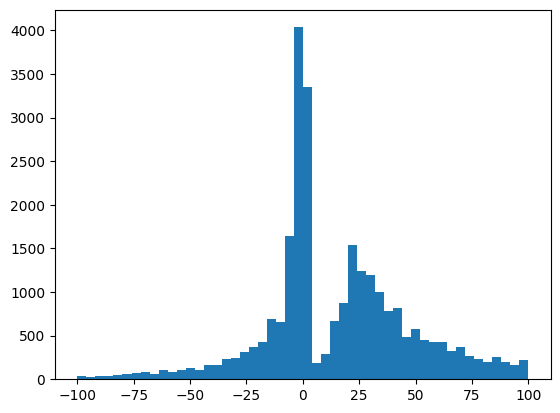

In [10]:
plt.hist(procurement['publication_close_interval'], bins=50, range=(-100, 100))

In [11]:
procurement['bids_close_interval'].describe()

count    15438.000000
mean        19.682990
std         30.347115
min      -1421.000000
25%         10.000000
50%         14.000000
75%         23.750000
max        968.000000
Name: bids_close_interval, dtype: float64

(array([0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 5.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 9.000e+00,
        1.200e+01, 7.000e+00, 1.200e+01, 2.500e+01, 3.200e+01, 1.020e+02,
        2.690e+02, 1.080e+02, 2.240e+02, 4.887e+03, 3.228e+03, 1.501e+03,
        1.107e+03, 4.910e+02, 1.149e+03, 7.410e+02, 2.930e+02, 2.240e+02,
        1.100e+02, 9.700e+01, 7.300e+01, 9.600e+01, 7.700e+01, 4.600e+01,
        5.600e+01, 3.500e+01, 2.900e+01, 3.000e+01, 3.200e+01, 3.300e+01,
        1.700e+01, 1.800e+01]),
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,

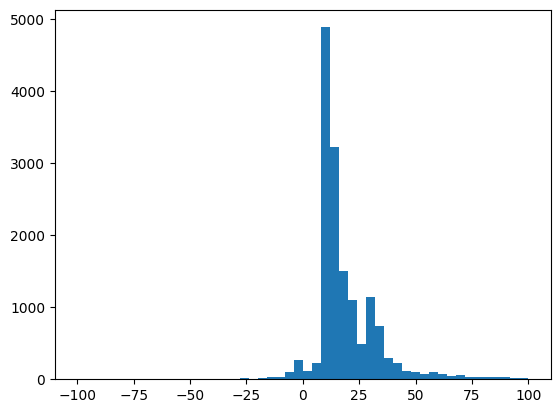

In [12]:
plt.hist(procurement['bids_close_interval'], bins=50, range=(-100, 100))